# **MACHINE LEARNING WITH COMPUTER VISION ASSESSMENT**

Create a handwriting recognition system which is capable of distinguishing specific handwriting numbers (0-9) from a group of given images and videos captured by scanned handwriting from a given test dataset

I will first build and train a convolutional neural network model using Mnist dataset in tensorflow

# **Building AI Model**

###  **Importing Libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
## mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Load MNIST dataset**

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### **Explore the data**

The name of the image number is: 5


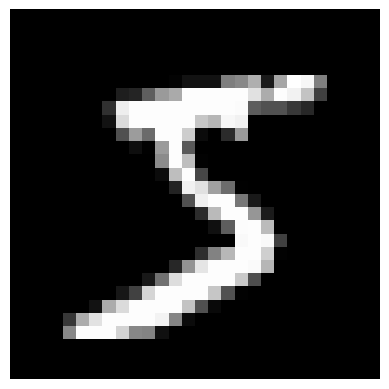

In [ ]:
get_img = X_train[0]
print(f"The name of the image number is: {y_train[0]}")
plt.axis('off')
plt.imshow(get_img, cmap='gray')

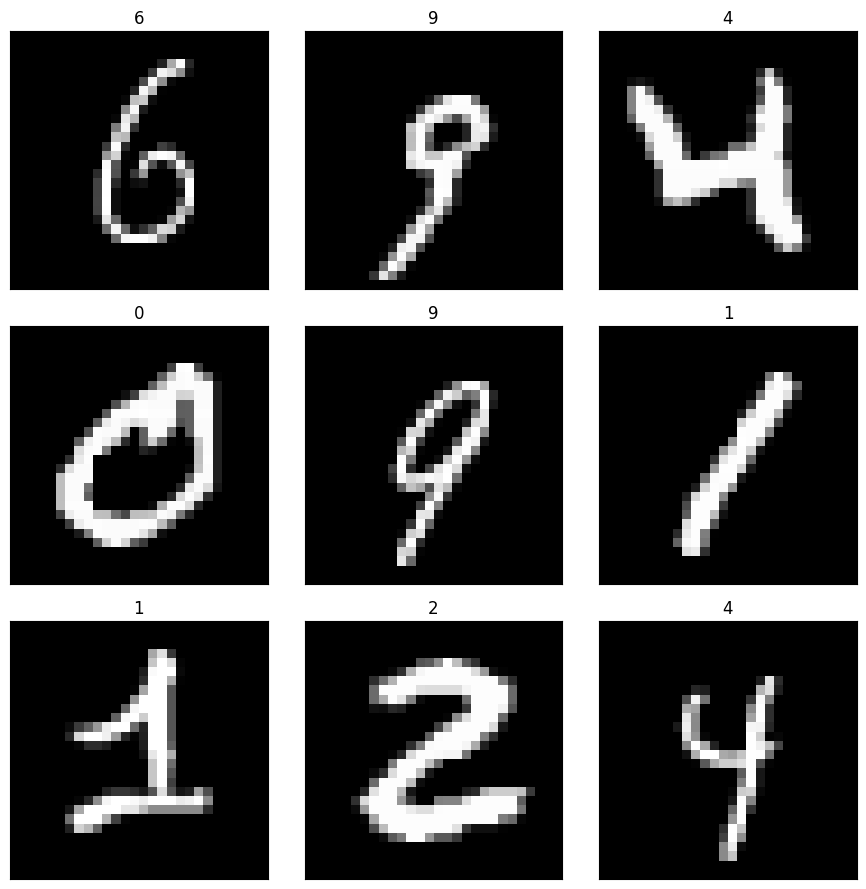

In [ ]:
# showing more numbers

plt.figure(figsize=(9,9))

for i in range(9):
    img = X_train[i+18].reshape((28,28)) / 255
    ax = plt.subplot(3, 3, i+1)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(False)


    ax.set_title(f'{y_train[i+18]}')
    plt.imshow(img, cmap='gray')

plt.tight_layout()
plt.show()

### **Data Preprocessing**

In [ ]:
# Normalize images the image to 0,1 range
X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
#Reshaping of data
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
print(f"X_train shape is: {X_train.shape}")
print(f"X_test shape is: {X_test.shape}")

X_train shape is: (60000, 28, 28, 1)
X_test shape is: (10000, 28, 28, 1)


In [ ]:
# Convert labels to categorical (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

### **Building the Model**

In [ ]:
# Build an exceptional CNN model
def build_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [ ]:
# Compile the model
model = build_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model with early stopping and learning rate reduction
callbacks = [
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
]

history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), callbacks=callbacks)


Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9339 - loss: 0.2264 - val_accuracy: 0.9838 - val_loss: 0.0510 - learning_rate: 0.0010
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - accuracy: 0.9842 - loss: 0.0509 - val_accuracy: 0.9907 - val_loss: 0.0264 - learning_rate: 0.0010
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9878 - loss: 0.0370 - val_accuracy: 0.9903 - val_loss: 0.0305 - learning_rate: 0.0010
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9903 - loss: 0.0307 - val_accuracy: 0.9888 - val_loss: 0.0352 - learning_rate: 0.0010
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9914 - loss: 0.0277 - val_accuracy: 0.9914 - val_loss: 0.0252 - learning_rate: 0.0010
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9918 - loss: 0.0266 - val_accuracy: 0.9927 - val_loss: 0.0264 - learning_rate: 0.0010
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9922 - loss: 0.02

In [ ]:
## Saving the model
model.save("/content/drive/MyDrive/Assessment/Computer vision/models/Advance_model.h5")


In [ ]:
model.save('/content/drive/MyDrive/Assessment/Computer vision/models/Advance_model.keras')

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9948 - loss: 0.0172
Test Accuracy: 99.60%


### **Testing Prediction**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


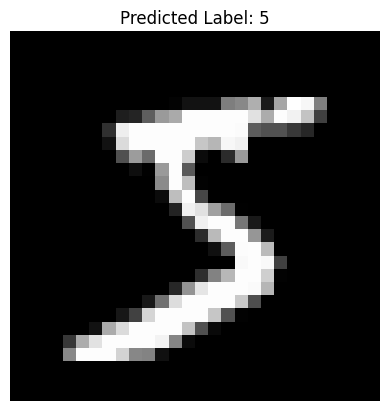

In [ ]:
def predict_images(image_paths):
    if isinstance(image_paths, str):
        image_paths = [image_paths]

    for img_path in image_paths:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28))
        img = img.reshape(1, 28, 28, 1) / 255.0
        prediction = model.predict(img)
        predicted_label = np.argmax(prediction)

        # Plot the image and prediction result
        plt.imshow(img.squeeze(), cmap='gray')
        plt.title(f"Predicted Label: {predicted_label}")
        plt.axis('off')
        plt.show()




image1 = "/content/drive/MyDrive/Assessment/Computer vision/Number_Test_Data/000.png"
predict_images(image1)
